**1) Análisis de señales ECG y detección de arritmias (Exploración y selección de datos)**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("Diagnostics.xlsx")
df.head()


,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


<ipython-input-6-0b726309bab6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrhythmia_counts.index, y=arrhythmia_counts.values, palette="magma")


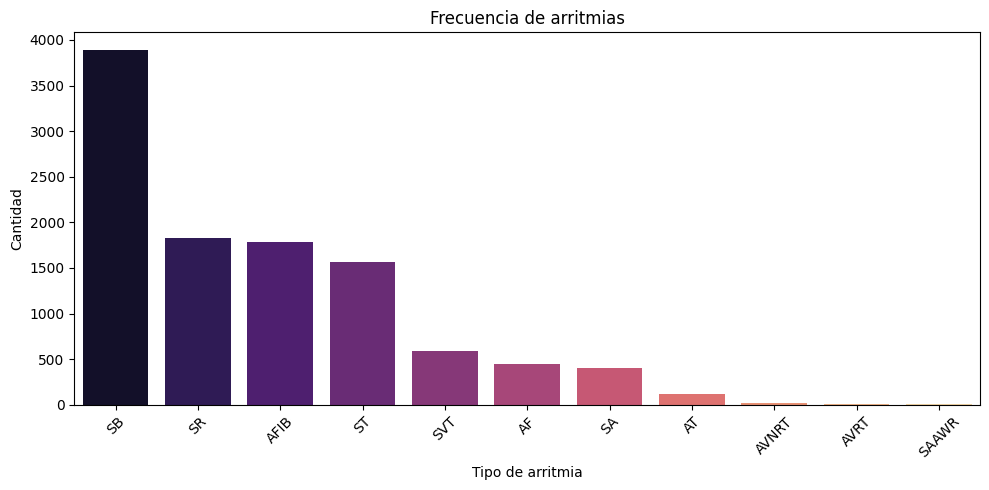

Análiis:
La arritmia más frecuente es 'SB' con 3889 casos.


In [6]:
#1 Tipos de arritmias más prevalentes

arrhythmia_counts = df['Rhythm'].value_counts()

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=arrhythmia_counts.index, y=arrhythmia_counts.values, palette="magma")
plt.title("Frecuencia de arritmias")
plt.xlabel("Tipo de arritmia")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis
print("Análiis:")
top = arrhythmia_counts.idxmax()
print(f"La arritmia más frecuente es '{top}' con {arrhythmia_counts[top]} casos.")


Esto sugiere que la bradicardia sinusal y la fibrilación auricular están entre las arritmias más frecuentes.

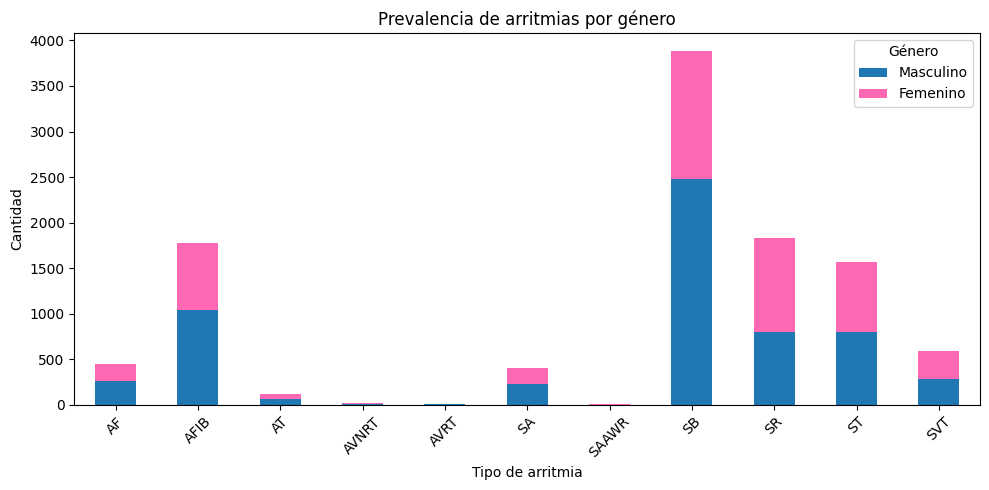

Análisis:
- 'AF' es más común en MALE (257 casos)
- 'AFIB' es más común en MALE (1041 casos)
- 'AT' es más común en MALE (64 casos)
- 'AVNRT' es más común en FEMALE (12 casos)
- 'AVRT' es más común en MALE (5 casos)
- 'SA' es más común en MALE (223 casos)
- 'SAAWR' es más común en FEMALE (6 casos)
- 'SB' es más común en MALE (2481 casos)
- 'SR' es más común en FEMALE (1024 casos)
- 'ST' es más común en MALE (799 casos)
- 'SVT' es más común en FEMALE (308 casos)


In [8]:
# 2 Arritmias más prevalentes por género


# Agrupar por tipo de arritmia y género
arrhythmia_by_gender = df.groupby(['Rhythm', 'Gender']).size().unstack(fill_value=0)

# Reordenar columnas para que 'MALE' esté primero
arrhythmia_by_gender = arrhythmia_by_gender[['MALE', 'FEMALE']]

# Definir colores: azul para masculino, rosado para femenino
colors = ['#1f77b4', '#ff69b4']

# Crear gráfico de barras apiladas
arrhythmia_by_gender.plot(kind='bar', stacked=True, figsize=(10, 5), color=colors)

# Etiquetas y título
plt.title("Prevalencia de arritmias por género")
plt.xlabel("Tipo de arritmia")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Género", labels=["Masculino", "Femenino"])
plt.tight_layout()
plt.show()

# Análisis textual
print("Análisis:")
for rhythm in arrhythmia_by_gender.index:
    dominant_gender = arrhythmia_by_gender.loc[rhythm].idxmax()
    count = arrhythmia_by_gender.loc[rhythm].max()
    print(f"- '{rhythm}' es más común en {dominant_gender} ({count} casos)")


<ipython-input-26-09c4fb101934>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrhythmia_by_age = df.groupby(['Rhythm', 'AgeGroup']).size().unstack(fill_value=0)
<ipython-input-26-09c4fb101934>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rhythm', y='PatientAge', palette='pastel')


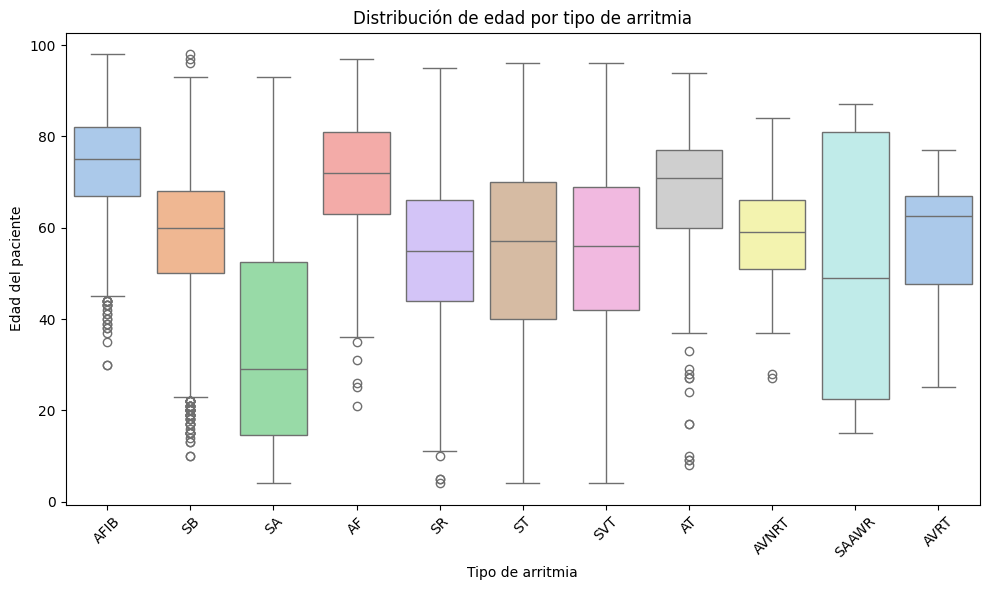

Análisis:
- El boxplot permite observar la variabilidad de edad para cada tipo de arritmia.
- Algunas arritmias presentan una distribución más centrada en adultos mayores, como AFIB.
- Otras, como NSR, tienen mayor dispersión de edades.
El grupo etario más representado en las arritmias es: 61-80


In [26]:
#3 Arritmias más prevalentes según edad

bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AgeGroup'] = pd.cut(df['PatientAge'], bins=bins, labels=labels)

arrhythmia_by_age = df.groupby(['Rhythm', 'AgeGroup']).size().unstack(fill_value=0)


# Boxplot de edad por tipo de arritmia
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rhythm', y='PatientAge', palette='pastel')
plt.title("Distribución de edad por tipo de arritmia")
plt.xlabel("Tipo de arritmia")
plt.ylabel("Edad del paciente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis
print("Análisis:")
print("- El boxplot permite observar la variabilidad de edad para cada tipo de arritmia.")
print("- Algunas arritmias presentan una distribución más centrada en adultos mayores, como AFIB.")
print("- Otras, como NSR, tienen mayor dispersión de edades.")
most_common_group = df['AgeGroup'].value_counts().idxmax()
print(f"El grupo etario más representado en las arritmias es: {most_common_group}")




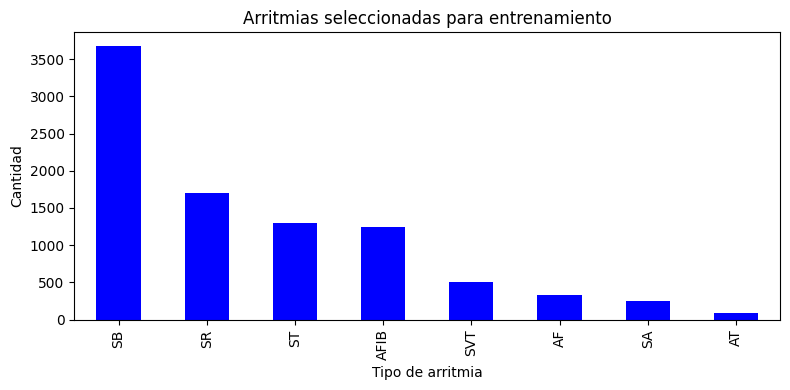

 Análisis:
- Se seleccionaron pacientes entre 20 y 80 años.
- Arritmias seleccionadas: SB, SR, ST, AFIB, SVT, AF, SA, AT.
- Total de registros seleccionados: 9122


In [28]:
# 4 Selección: arritmias con suficientes datos y rango etario útil

selected_arrhythmias = arrhythmia_counts[arrhythmia_counts > 100].index.tolist()
filtered_df = df[df['Rhythm'].isin(selected_arrhythmias) & df['PatientAge'].between(20, 80)]

# Estadísticas del subconjunto
usable_age_range = (filtered_df['PatientAge'].min(), filtered_df['PatientAge'].max())
usable_arrhythmias = filtered_df['Rhythm'].value_counts()

# Gráfico
usable_arrhythmias.plot(kind='bar', figsize=(8, 4), color='Blue')
plt.title("Arritmias seleccionadas para entrenamiento")
plt.xlabel("Tipo de arritmia")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# Conclusión
print(" Análisis:")
print(f"- Se seleccionaron pacientes entre {usable_age_range[0]} y {usable_age_range[1]} años.")
print(f"- Arritmias seleccionadas: {', '.join(usable_arrhythmias.index)}.")
print(f"- Total de registros seleccionados: {filtered_df.shape[0]}")
